In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
register_matplotlib_converters()

In [ ]:
df_ice_cream=pd.read_csv('ice_cream.csv')
df_ice_cream.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [ ]:
df_ice_cream.rename(columns={"DATE":"date",'IPN31152N':'production'},inplace=True)

In [ ]:
df_ice_cream['date']=pd.to_datetime(df_ice_cream.date)

In [ ]:
df_ice_cream.set_index('date',inplace=True)

In [ ]:
start_date=pd.to_datetime('2010-01-01')
df_ice_cream = df_ice_cream[start_date:]

In [ ]:
df_ice_cream.head()

,production
date,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576


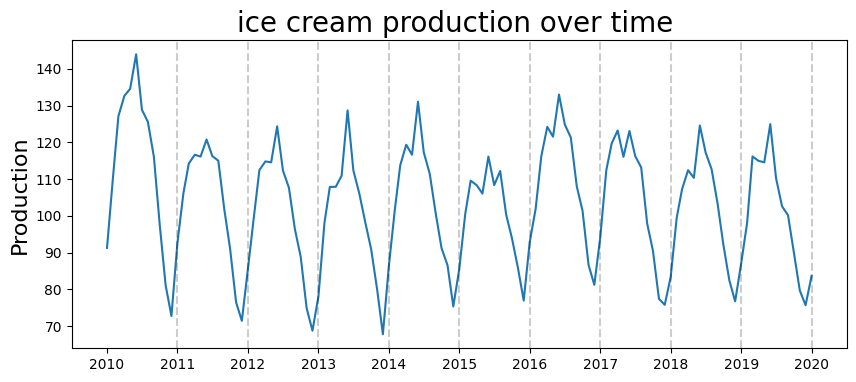

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(df_ice_cream.production)
plt.title("ice cream production over time ",fontsize=20)
plt.ylabel("Production",fontsize=16)
for year in range(2011,2021):
  plt.axvline(pd.to_datetime(str(year)+'-01-01'),color='k',linestyle='--',alpha=0.2)

ACF

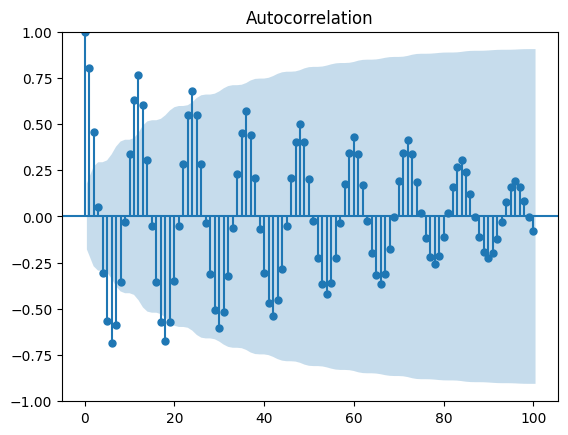

In [ ]:
acf_plot=plot_acf(df_ice_cream.production,lags=100)

PACF

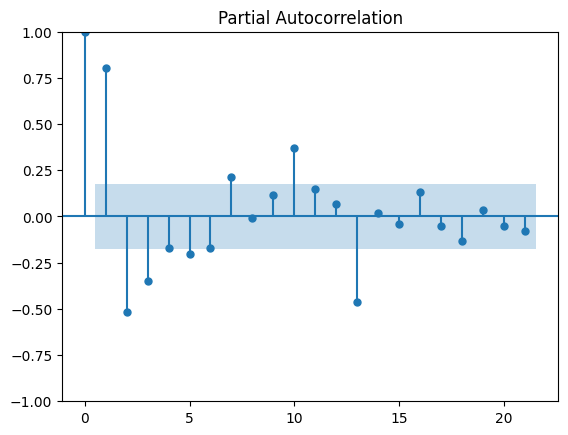

In [ ]:
pacf_plot=plot_pacf(df_ice_cream.production)

stock price

In [ ]:
import yfinance as yf

In [ ]:
tickerSymbol='SPY'

In [ ]:
tickerData=yf.Ticker(tickerSymbol)

In [ ]:
tickerDf=tickerData.history(period='1d',start='2015-1-1',end='2024-12-31')

In [ ]:
tickerDf=tickerDf[["Close"]]

In [ ]:
tickerDf.head()

,Close
Date,
2015-01-02 00:00:00-05:00,172.075226
2015-01-05 00:00:00-05:00,168.967621
2015-01-06 00:00:00-05:00,167.376099
2015-01-07 00:00:00-05:00,169.461807
2015-01-08 00:00:00-05:00,172.468903


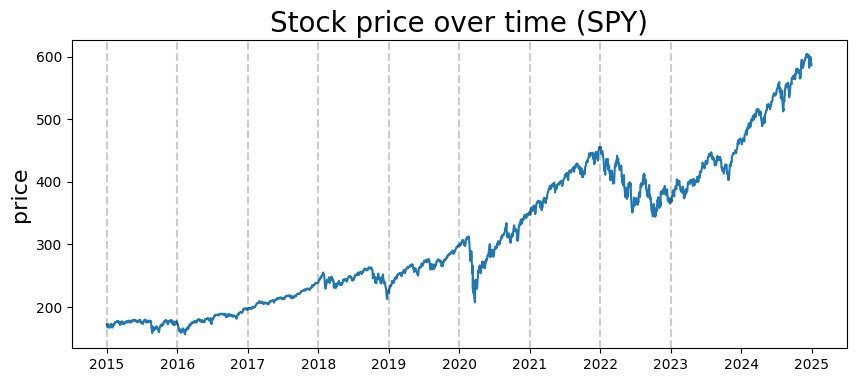

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.Close)
plt.title('Stock price over time (%s)'%tickerSymbol,fontsize=20)
plt.ylabel('price',fontsize=16)
for year in range(2015,2024):
  plt.axvline(pd.to_datetime(str(year)+'-01-01'),color='k',linestyle='--',alpha=0.2)

Stationarity: take first difference of this series

In [ ]:
first_diffs=tickerDf.Close.values[1:] -tickerDf.Close.values[:-1]
first_diffs=np.concatenate([first_diffs,[0]])

In [ ]:
tickerDf['FirstDifference']=first_diffs

In [ ]:
tickerDf.head()

,Close,FirstDifference
Date,,
2015-01-02 00:00:00-05:00,172.075226,-3.107605
2015-01-05 00:00:00-05:00,168.967621,-1.591522
2015-01-06 00:00:00-05:00,167.376099,2.085709
2015-01-07 00:00:00-05:00,169.461807,3.007095
2015-01-08 00:00:00-05:00,172.468903,-1.382034


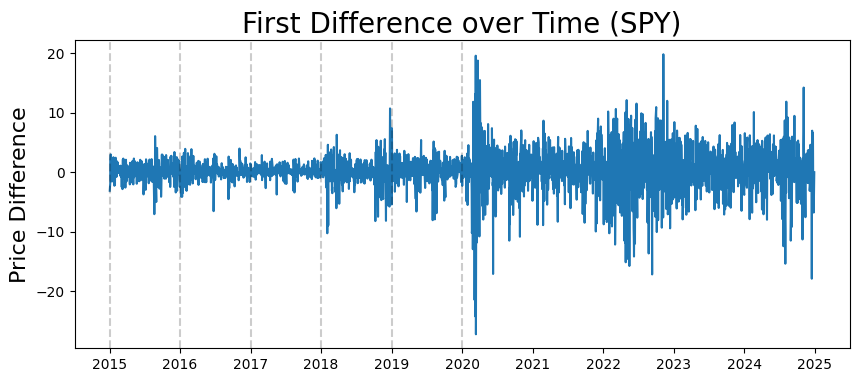

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.FirstDifference)
plt.title('First Difference over Time (%s)'%tickerSymbol, fontsize=20)
plt.ylabel('Price Difference', fontsize=16)
for year in range(2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

ACF

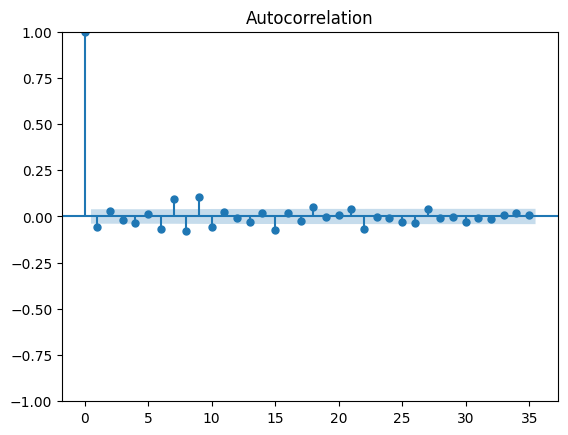

In [ ]:
acf_plot = plot_acf(tickerDf.FirstDifference)

PACF

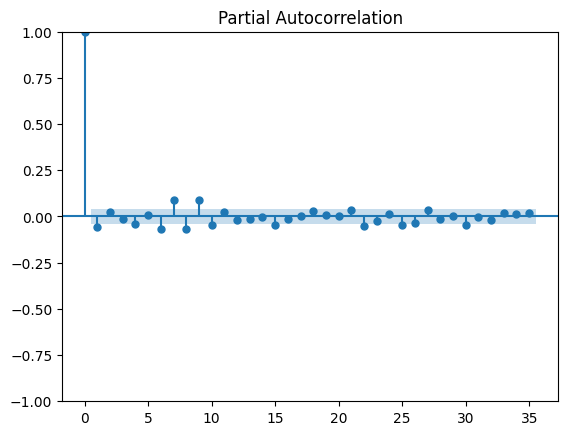

In [ ]:
pacf_plot = plot_pacf(tickerDf.FirstDifference)